In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/prama/OneDrive/Desktop/datasets/merged_dataset.csv")
df.head()


,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [2]:
# General information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32337 entries, 0 to 32336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      32337 non-null  object
 1   Language  32337 non-null  object
dtypes: object(2)
memory usage: 505.4+ KB


In [3]:
# Summary statistics for numerical columns (if any)
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                                                     Text Language
count                                               32337    32337
unique                                              32126       30
top     haec commentatio automatice praeparata res ast...  English
freq                                                   48     2385


In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Text        0
Language    0
dtype: int64


In [5]:
# Check for duplicate rows
print("\nDuplicate Rows Count:", df.duplicated().sum())


Duplicate Rows Count: 207


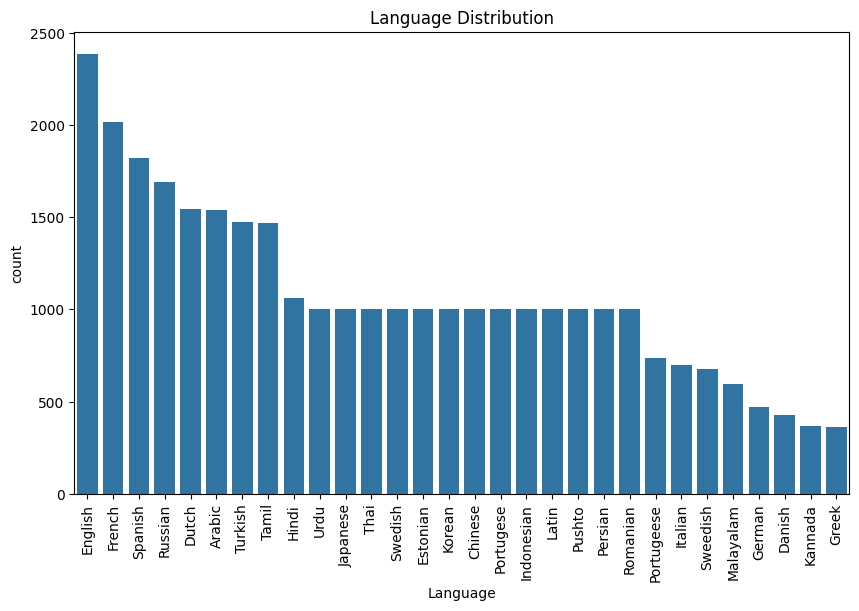

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Language', order=df['Language'].value_counts().index)
plt.title('Language Distribution')
plt.xticks(rotation=90)
plt.show()


In [7]:
# Count of missing values before handling
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Count of missing values after handling
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values Before Handling:
Text        0
Language    0
dtype: int64

Missing Values After Handling:
Text        0
Language    0
dtype: int64


In [8]:
# Count duplicates before handling
print("\nDuplicate Rows Before Handling:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

# Count duplicates after handling
print("\nDuplicate Rows After Handling:", df.duplicated().sum())



Duplicate Rows Before Handling: 207

Duplicate Rows After Handling: 0


In [9]:
import re

# Function to clean text
def clean_text(text):
    # Remove backslashes, line breaks, and extra whitespaces
    text = re.sub(r'\\', '', text)       # Remove backslashes
    text = re.sub(r'\n', ' ', text)      # Replace line breaks with a space
    text = re.sub(r'\s+', ' ', text)     # Replace multiple spaces with a single space
    
    # Remove special characters except for non-English text
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)      # Remove numbers

    # Remove leading and trailing whitespaces
    text = text.strip()
    
    return text

# Apply text cleaning to the 'Text' column
df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Convert text to lowercase
df['Cleaned_Text'] = df['Cleaned_Text'].str.lower()


In [10]:
print("\nInitial Dataset:")
print(df[['Text', 'Language']].head())  # Original dataset snapshot

print("\nAfter Preprocessing:")
print(df[['Cleaned_Text', 'Language']].head())  # Preprocessed dataset snapshot



Initial Dataset:
                                                Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch

After Preprocessing:
                                        Cleaned_Text  Language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas på eng the jesuits...   Swedish
2  ถนนเจรญกรง อกษรโรมน thanon charoen krung เรมตง...      Thai
3  வசகபபடடனம தமழசசஙகதத இநதப பததரகவசகபபடடன ஆசரயர ச...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [11]:
# Display rows 21861 to 32132 
subset = df[21861:32132]
print(subset)


                                                    Text Language  \
22002  The study of nature is a large, if not the onl...  English   
22003  Although humans are part of nature, human acti...  English   
22004  [1] The word nature is borrowed from the Old F...  English   
22005  [2] In ancient philosophy, natura is mostly us...  English   
22006  [3][4] \nThe concept of nature as a whole, the...  English   
...                                                  ...      ...   
32332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada   
32333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada   
32334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada   
32335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada   
32336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada   

                                            Cleaned_Text  
22002  the study of nature is a large if not the only...  
22003  although humans are part of nature human activ

In [12]:
print("\nInitial Dataset:")
print(subset[['Text', 'Language']].head())  # Original dataset snapshot

print("\nAfter Preprocessing:")
print(subset[['Cleaned_Text', 'Language']].head())  # Preprocessed dataset snapshot



Initial Dataset:
                                                    Text Language
22002  The study of nature is a large, if not the onl...  English
22003  Although humans are part of nature, human acti...  English
22004  [1] The word nature is borrowed from the Old F...  English
22005  [2] In ancient philosophy, natura is mostly us...  English
22006  [3][4] \nThe concept of nature as a whole, the...  English

After Preprocessing:
                                            Cleaned_Text Language
22002  the study of nature is a large if not the only...  English
22003  although humans are part of nature human activ...  English
22004  the word nature is borrowed from the old frenc...  English
22005  in ancient philosophy natura is mostly used as...  English
22006  the concept of nature as a whole the physical ...  English


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Language_Label'] = le.fit_transform(df['Language'])


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(df['Cleaned_Text'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [15]:
# Show the first 5 rows of the TF-IDF DataFrame
print("TF-IDF Representation (First 5 Rows):")
print(tfidf_df.head())

# Combine the original text and its TF-IDF representation for better comparison
comparison_df = pd.concat([df['Cleaned_Text'].reset_index(drop=True), tfidf_df], axis=1)

# Show a few rows of the combined DataFrame
print("\nOriginal Text with TF-IDF Representation:")
print(comparison_df.head())


TF-IDF Representation (First 5 Rows):
   aan  aasta    aastal   ab  about   ac   ad  ada  adalah   af  ...   된다  \
0  0.0    0.0  0.330151  0.0    0.0  0.0  0.0  0.0     0.0  0.0  ...  0.0   
1  0.0    0.0  0.000000  0.0    0.0  0.0  0.0  0.0     0.0  0.0  ...  0.0   
2  0.0    0.0  0.000000  0.0    0.0  0.0  0.0  0.0     0.0  0.0  ...  0.0   
3  0.0    0.0  0.000000  0.0    0.0  0.0  0.0  0.0     0.0  0.0  ...  0.0   
4  0.0    0.0  0.000000  0.0    0.0  0.0  0.0  0.0     0.0  0.0  ...  0.0   

    또한  불타는   위해   이후   있는   있다  자신의   한다   함께  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 1000 columns]

Original Text with TF-IDF Representation:
                                        Cleaned_Text  aan  aasta    aastal  \
0  klement gottwaldi surnukeha palsameeriti ning ...  0.0  

In [16]:
# Style the DataFrame for better readability
comparison_df.head(5).style.set_table_attributes("style='display:inline'").set_caption("TF-IDF Conversion Example")


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for Bag of Words
vectorizer = CountVectorizer(max_features=1000)  # Adjust max_features as needed

# Apply Bag of Words on the 'Cleaned_Text' column
X_bow = vectorizer.fit_transform(df['Cleaned_Text'])

# Convert the result into a DataFrame for better visualization
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Display the first few rows of the Bag of Words DataFrame
print("Bag of Words Representation:")
print(bow_df.head())


Bag of Words Representation:
   aan  aasta  aastal  ab  about  ac  ad  ada  adalah  af  ...  된다  또한  불타는  \
0    0      0       1   0      0   0   0    0       0   0  ...   0   0    0   
1    0      0       0   0      0   0   0    0       0   0  ...   0   0    0   
2    0      0       0   0      0   0   0    0       0   0  ...   0   0    0   
3    0      0       0   0      0   0   0    0       0   0  ...   0   0    0   
4    0      0       0   0      0   0   0    0       0   0  ...   0   0    0   

   위해  이후  있는  있다  자신의  한다  함께  
0   0   0   0   0    0   0   0  
1   0   0   0   0    0   0   0  
2   0   0   0   0    0   0   0  
3   0   0   0   0    0   0   0  
4   0   0   0   0    0   0   0  

[5 rows x 1000 columns]


In [18]:
from sklearn.model_selection import train_test_split

# Split dataset into features (X) and target (y)
X = bow_df  # Use the Bag of Words features
y = df['Language']  # Target column (Language)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (25704, 1000)
Testing data shape: (6426, 1000)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}




Logistic Regression Confusion Matrix:


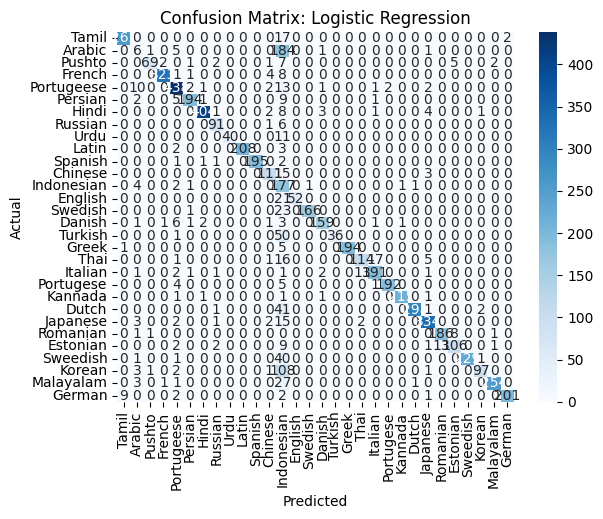


Naive Bayes Confusion Matrix:


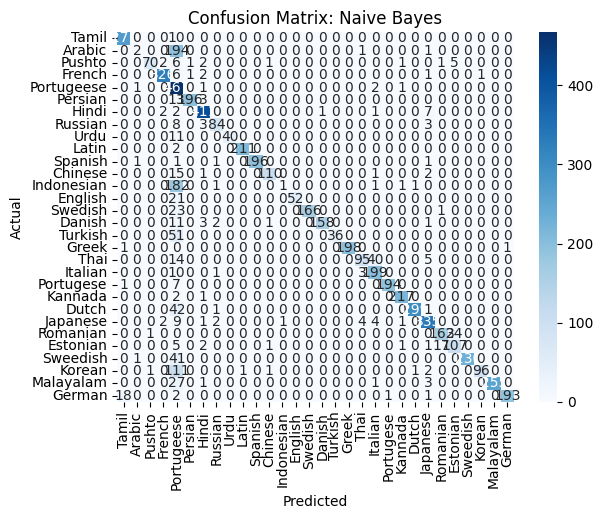


Decision Tree Confusion Matrix:


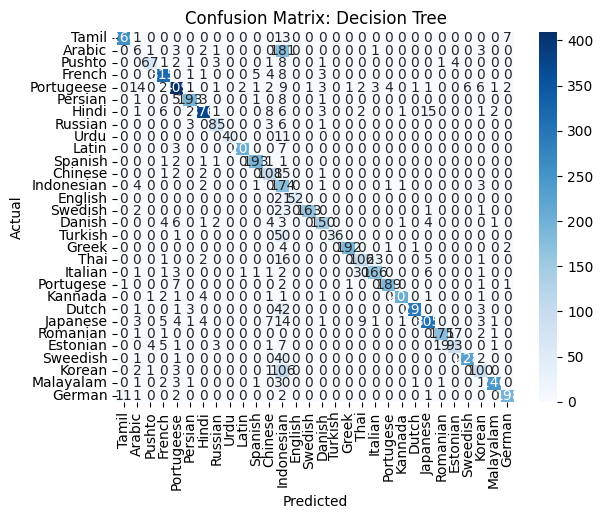


Random Forest Confusion Matrix:


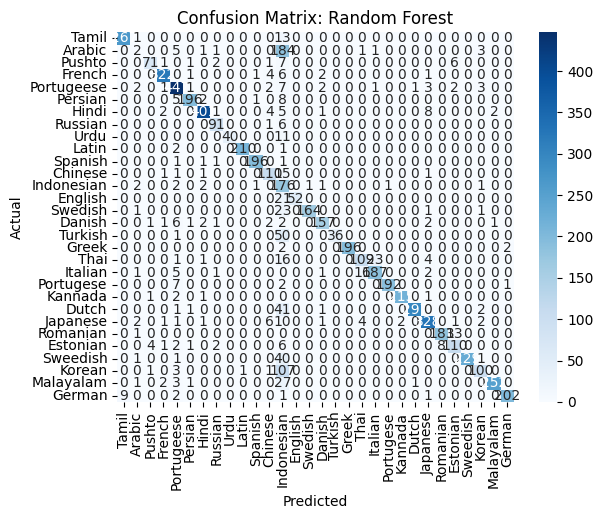


SVM Confusion Matrix:


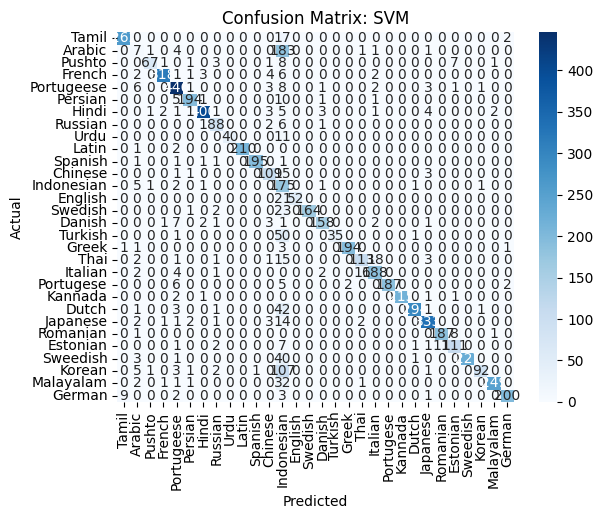


KNN Confusion Matrix:


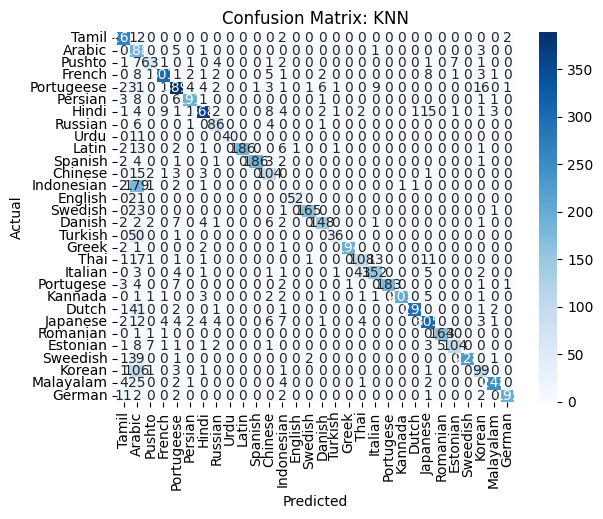

In [23]:
# Train and evaluate each model
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1 Score": report["weighted avg"]["f1-score"]
    })
    
    # Display confusion matrix
    print(f"\n{name} Confusion Matrix:")
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)


Model Performance:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.862434   0.917835  0.862434  0.875645
1          Naive Bayes  0.836757   0.886390  0.836757  0.830542
2        Decision Tree  0.829132   0.879033  0.829132  0.841784
3        Random Forest  0.861811   0.907270  0.861811  0.871049
4                  SVM  0.857454   0.911560  0.857454  0.869756
5                  KNN  0.815904   0.866256  0.815904  0.829744


<Figure size 1200x600 with 0 Axes>

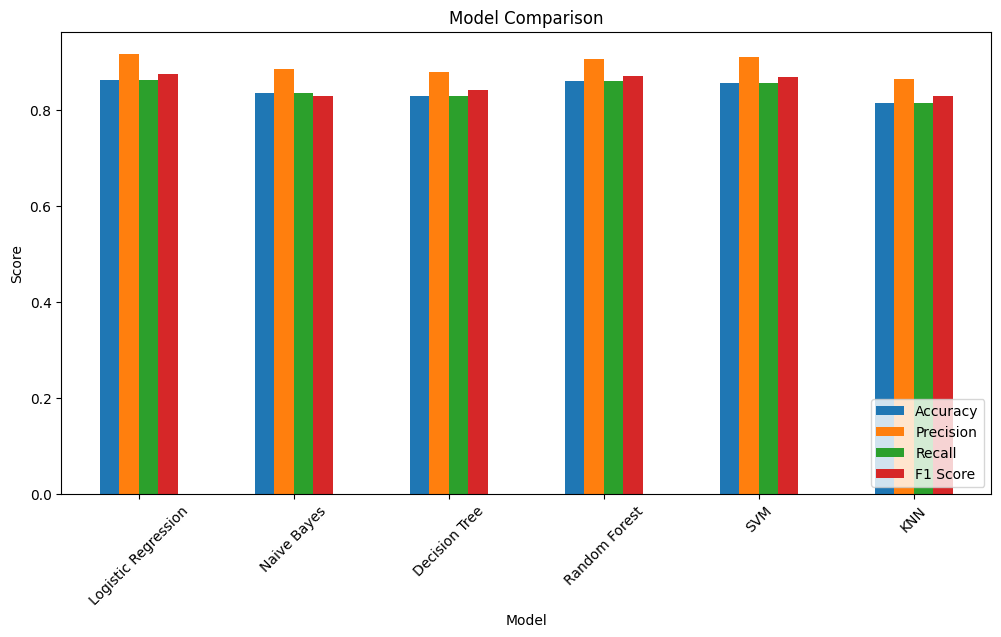

In [24]:
# Display results as a table
print("Model Performance:")
print(results_df)

# Plot a bar graph for comparison
plt.figure(figsize=(12, 6))
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1 Score"]].plot(kind='bar', figsize=(12, 6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


In [25]:
sample_texts = X_test.iloc[:5]  # Select a few samples
actual_labels = y_test.iloc[:5]

for name, model in models.items():
    sample_predictions = model.predict(sample_texts)
    print(f"\n{name} Predictions:")
    for i, text in enumerate(sample_texts.index):
        print(f"Actual: {actual_labels.iloc[i]}, Predicted: {sample_predictions[i]}")



Logistic Regression Predictions:
Actual: Tamil, Predicted: Japanese
Actual: Arabic, Predicted: Arabic
Actual: Pushto, Predicted: Pushto
Actual: French, Predicted: French
Actual: Portugeese, Predicted: Portugeese

Naive Bayes Predictions:
Actual: Tamil, Predicted: English
Actual: Arabic, Predicted: Arabic
Actual: Pushto, Predicted: Pushto
Actual: French, Predicted: French
Actual: Portugeese, Predicted: Portugeese

Decision Tree Predictions:
Actual: Tamil, Predicted: Japanese
Actual: Arabic, Predicted: Arabic
Actual: Pushto, Predicted: Pushto
Actual: French, Predicted: French
Actual: Portugeese, Predicted: Spanish

Random Forest Predictions:
Actual: Tamil, Predicted: Japanese
Actual: Arabic, Predicted: Arabic
Actual: Pushto, Predicted: Pushto
Actual: French, Predicted: French
Actual: Portugeese, Predicted: English

SVM Predictions:
Actual: Tamil, Predicted: Japanese
Actual: Arabic, Predicted: Arabic
Actual: Pushto, Predicted: Pushto
Actual: French, Predicted: French
Actual: Portugeese, 